<a href="https://colab.research.google.com/github/Auryvilia/Machine_Learning/blob/main/Tugas_Machine_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, recall_score, precision_score
from keras.models import Sequential
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Nadam
from keras.layers import Dense,Input, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Penjelasan:
1. pandas digunakan untuk manipulasi dan analisis data tabular.
2. numpy untuk operasi array multidimensi.
3. matplotlib dan seaborn untuk visualisasi data.
4. LabelEncoder untuk mengubah label kategori menjadi format numerik.
5. train_test_split untuk membagi dataset menjadi data pelatihan dan pengujian.
6. MinMaxScaler untuk skala data agar nilai berada dalam rentang tertentu.
7. Metric seperti confusion_matrix, classification_report, f1_score, dll. digunakan untuk mengevaluasi performa model.
8. Sequential dari Keras digunakan untuk membangun arsitektur model deep learning.

In [ ]:
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


Penjelasan:
`df = pd.read_csv('loan_data.csv')` membaca data dari file CSV menjadi DataFrame, dan `df.head()` menampilkan 5 baris pertama dari data tersebut.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Penjelasan:
`df.info()` menampilkan informasi tentang DataFrame seperti jumlah baris, tipe data setiap kolom, jumlah nilai non-null, dan penggunaan memori.

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Penjelasan:
`df.isnull().sum()` menghitung jumlah nilai `NaN` (hilang) di setiap kolom dalam DataFrame.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


Penjelasan:
`df.describe().transpose()` memberikan ringkasan statistik deskriptif seperti nilai min, max, rata-rata, dan standar deviasi untuk setiap kolom numerik dalam DataFrame. Fungsi `transpose()` mengubah formatnya menjadi baris sebagai indeks dan kolom sebagai nilai.

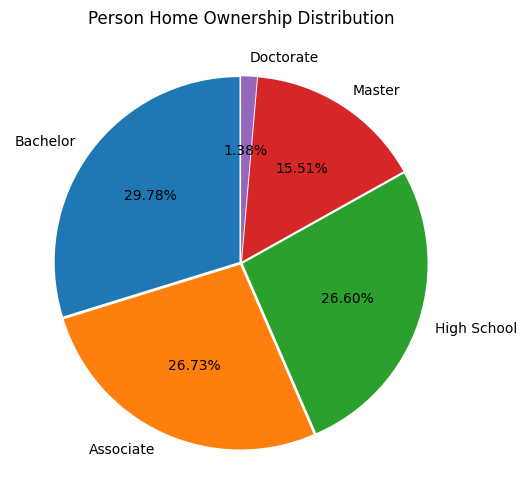

In [ ]:
cnt=df['person_education'].value_counts()
explode = [0.01] * len(cnt)
plt.figure(figsize=(8,6))
plt.pie(x=cnt, labels=cnt.index, autopct='%1.2F%%', startangle=90, explode=explode)
plt.title('Person Education Distribution')

plt.show()

Penjelasan:
Kode tersebut membuat pie chart untuk mendistribusikan data `person_education` dalam bentuk persentase.

- `cnt` menghitung jumlah frekuensi untuk setiap kategori dalam kolom `'person_education'`.
- `explode` menambahkan jarak kecil pada elemen tertentu dalam pie chart untuk memberikan efek visual.
- `plt.pie()` membuat pie chart dengan label, persentase, dan tampilan awal.
- `plt.title()` menambahkan judul pada pie chart.
- `plt.show()` menampilkan pie chart.

Hasilnya adalah visualisasi distribusi pendidikan dalam bentuk diagram pie.


Penjelasan Diagram Pie:
Diagram lingkaran tersebut menunjukkan distribusi kepemilikan rumah berdasarkan tingkat pendidikan. Berikut adalah rinciannya:

- **Bachelor (Sarjana):** 29.78%
- **Associate (Diploma):** 26.73%
- **High School (SMA):** 26.60%
- **Master (Magister):** 15.51%
- **Doctorate (Doktor):** 1.38%

Sarjana memiliki proporsi tertinggi, sementara Doktor memiliki proporsi terendah. Diagram ini menggambarkan bagaimana tingkat pendidikan berkorelasi dengan kepemilikan rumah.

In [ ]:
le = LabelEncoder()
df['person_education'] = le.fit_transform(df['person_education'])
print(df)

       person_age person_gender  person_education  person_income  \
0            22.0        female                 4        71948.0   
1            21.0        female                 3        12282.0   
2            25.0        female                 3        12438.0   
3            23.0        female                 1        79753.0   
4            24.0          male                 4        66135.0   
...           ...           ...               ...            ...   
44995        27.0          male                 0        47971.0   
44996        37.0        female                 0        65800.0   
44997        33.0          male                 0        56942.0   
44998        29.0          male                 1        33164.0   
44999        24.0          male                 3        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0        

Penjelasan:
Kode tersebut menggunakan `LabelEncoder` untuk mengubah kategori dalam kolom `'person_education'` menjadi angka (kode numerik).

- `le.fit_transform(df['person_education'])` mengonversi kategori ke format numerik.
- `print(df)` menampilkan DataFrame dengan kolom `'person_education'` yang telah dikodekan.

In [ ]:
x=df.loc[:, df.columns == "person_education"]
y=df.loc[:, ["person_education"]]

Penjelasan:
Kode tersebut digunakan untuk memisahkan kolom `'person_education'` menjadi dua bentuk:

1. `x = df.loc[:, df.columns == "person_education"]`  
   - Mengambil semua data dari kolom `'person_education'`.

2. `y = df.loc[:, ["person_education"]]`  
   - Mengambil kolom `'person_education'` sebagai DataFrame dengan nama kolomnya tetap.

Keduanya bertujuan untuk mengekstrak kolom `'person_education'` dengan cara yang berbeda.

In [ ]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)
x_scale

array([[1.  ],
       [0.75],
       [0.75],
       ...,
       [0.  ],
       [0.25],
       [0.75]])

Penjelasan:
Kode tersebut menggunakan `MinMaxScaler` untuk menskalakan data di `x`.

- `scaler.fit_transform(x)` mengubah data `x` agar semua nilai berada dalam rentang tertentu (0 hingga 1).
- `x_scaled` adalah data yang sudah diskalakan.

In [ ]:
# num_classes = df['person_education'].nunique()
y_categorical = to_categorical(y, num_classes = 0)
y_categorical

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Penjelasan:
Kode tersebut mengubah kolom `y` menjadi format one-hot encoding menggunakan `to_categorical`.

- `df['person_education'].nunique()` menghitung jumlah kelas unik dari `'person_education'`.
- `to_categorical(y, num_classes=0)` mengubah kategori menjadi format one-hot encoding, tetapi di sini `num_classes=0` akan menyebabkan kesalahan jika tidak diubah sesuai jumlah kelas yang sebenarnya.

Pastikan `num_classes` diubah menjadi jumlah kelas unik yang benar dari `'person_education'`.

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_categorical, test_size=0.3, random_state=42)
print('x_train:',np.shape(x_train))
print('y_train:',np.shape(y_train))
print('x_test:',np.shape(x_test))
print('y_test:',np.shape(y_test))

x_train: (31500, 1)
y_train: (31500, 5)
x_test: (13500, 1)
y_test: (13500, 5)


Penjelasan:
Kode tersebut membagi dataset menjadi data pelatihan (`x_train`, `y_train`) dan pengujian (`x_test`, `y_test`).

- `train_test_split` membagi data dengan ukuran test 30% dan sisa 70% untuk pelatihan.
- `print` menampilkan ukuran bentuk dari setiap subset data yang telah dibagi.

In [ ]:
earlystop=EarlyStopping(
    monitor='accuracy', min_delta=0.01, mode='min', verbose=1, patience=20, restore_best_weights=False,
    )
reducelr=ReduceLROnPlateau(
    monitor="accuracy", factor=0.0000001, patience=2,
    verbose=1, mode="auto"
)

Penjelasan:
Kode tersebut membuat dua callback untuk melatih model deep learning:

1. **EarlyStopping**:
   - `monitor='accuracy'`: Memantau akurasi selama pelatihan.
   - `min_delta=0.01`: Membutuhkan peningkatan minimal 1% pada akurasi untuk melanjutkan pelatihan.
   - `patience=20`: Jika tidak ada peningkatan dalam 20 epoch, pelatihan akan dihentikan.
   
2. **ReduceLROnPlateau**:
   - `monitor="accuracy"`: Memantau akurasi untuk mengurangi laju pembelajaran.
   - `factor=0.0000001`: Mengurangi laju pembelajaran setiap kali ada peningkatan yang lambat.
   - `patience=2`: Mengurangi laju pembelajaran jika tidak ada peningkatan dalam 2 epoch.

Keduanya berguna untuk menghindari overfitting dan meningkatkan efisiensi pelatihan model.

In [ ]:
optimizers = Nadam(
)

#Train using Selected Models
model = Sequential ([
    Input(shape=(1,)),
    Dense(units=128, activation='elu'),
    Dense(units=64, activation='silu'),
    Dense(units=32, activation='relu'),
    BatchNormalization(momentum=0.1),
    Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,885 (42.52 KB)

 Trainable params: 10,821 (42.27 KB)

 Non-trainable params: 64 (256.00 B)

Penjelasan:
Kode tersebut membuat model Sequential dengan beberapa lapisan:

- `Nadam()` adalah optimasi yang digunakan untuk melatih model.
- Model terdiri dari beberapa lapisan:
  - `Dense` untuk lapisan penuh dengan fungsi aktivasi seperti `elu`, `silu`, dan `relu`.
  - `BatchNormalization` untuk normalisasi data setelah setiap lapisan penuh.
  - Lapisan akhir menggunakan `Dense` dengan fungsi aktivasi `softmax` untuk klasifikasi multi-kelas.
  
- `model.summary()` menampilkan ringkasan arsitektur model dengan jumlah parameter yang dilatih.

In [ ]:
model.compile(optimizer=optimizers, loss=CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, callbacks=[earlystop, reducelr])

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9267 - loss: 0.4155 - val_accuracy: 1.0000 - val_loss: 0.0253 - learning_rate: 0.0010
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0046 - learning_rate: 0.0010
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 4/100
486/493 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.8962e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000474974513e-10.
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 6.8807e-04 - val_accuracy: 1.0000 - val_loss: 5.9724e-04 - learning_rate: 0.0010
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 4.1669e-04 - val_accuracy: 1.0000 - val_loss: 7.9880e-04 - learning_rate: 1.0000e-10
Epoch 6/100
480/493 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accu

Penjelasaana:
Kode tersebut mengompilasi model deep learning dan melatihnya dengan data yang sudah disiapkan:

- `model.compile()`:
  - `optimizer=optimizers`: Menggunakan optimisasi Nadam.
  - `loss=CategoricalCrossentropy()`: Fungsi kerugian untuk klasifikasi multi-kelas.
  - `metrics=['accuracy']`: Metrik evaluasi yang digunakan adalah akurasi.

- `model.fit()`:
  - Melatih model dengan data `x_train` dan `y_train`.
  - `validation_data` untuk mengevaluasi model pada data uji `x_test` dan `y_test`.
  - `epochs=100` untuk jumlah epoch pelatihan.
  - `batch_size=64` untuk ukuran batch yang digunakan.
  - `callbacks=[earlystop, reducelr]` untuk menghentikan pelatihan saat akurasi stagnan atau mengurangi laju pembelajaran.

Proses ini bertujuan untuk melatih model dengan memperhatikan performa validasi serta mengoptimalkan model berdasarkan evaluasi yang dilakukan pada data validasi.

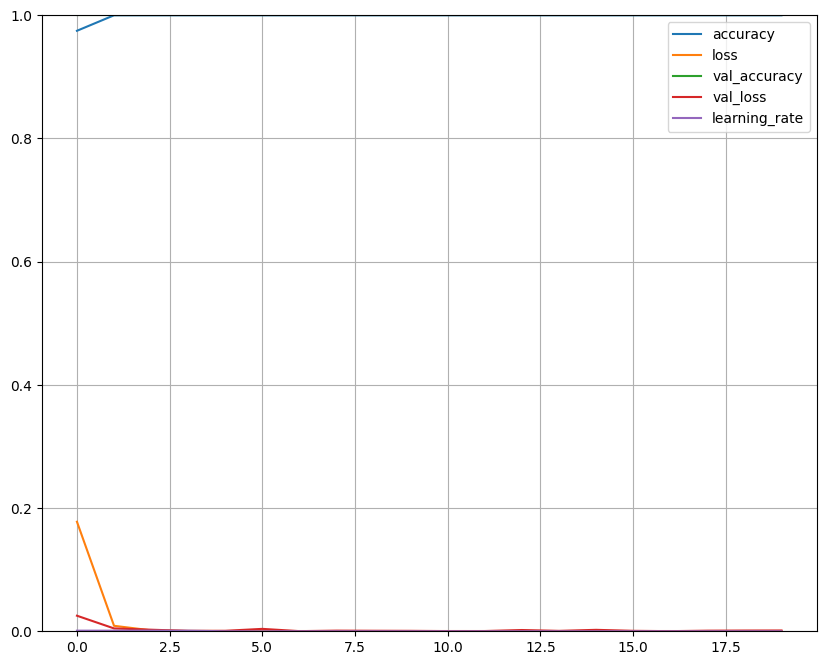

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Penjelasan:
Kode tersebut membuat plot untuk mengevaluasi performa model selama pelatihan:

- `pd.DataFrame(history.history)` mengubah riwayat pelatihan dari `history.history` menjadi DataFrame.
- `.plot(figsize=(10, 10))` membuat plot grafik untuk metrik seperti akurasi dan kerugian selama pelatihan.
- `plt.grid(True)` menambahkan kisi pada grafik.
- `plt.gca().set_ylim(0, 1)` membatasi sumbu Y antara 0 dan 1 untuk skala metrik.
- `plt.show()` menampilkan grafik.

Tujuan dari plot ini adalah untuk memvisualisasikan perubahan metrik (akuras dan kerugian) selama pelatihan model.


Penjelasan grafik
Grafik ini menggambarkan tren berbagai metrik selama pelatihan model, termasuk:

1. **Accuracy (biru):** Akurasi meningkat tajam di awal pelatihan, mendekati nilai 1 (100%), menunjukkan bahwa model belajar dengan cepat.
   
2. **Loss (oranye):** Loss turun drastis di awal pelatihan dan mendekati 0, menunjukkan bahwa model berhasil meminimalkan kesalahan prediksi.

3. **Val_accuracy (hijau):** Akurasi pada data validasi tidak terlihat jelas di grafik ini. Perlu diperiksa apakah data validasi dihitung pada semua epoch.

4. **Val_loss (merah):** Val_loss stabil pada angka rendah setelah penurunan awal, menunjukkan bahwa model generalisasi cukup baik terhadap data validasi.

5. **Learning_rate (ungu):** Laju pembelajaran tetap konstan selama pelatihan, tanpa penurunan adaptif.

**Kesimpulan:**
Model menunjukkan performa yang baik dengan loss yang menurun dan akurasi meningkat cepat. Namun, kurangnya data validasi yang terlihat (val_accuracy dan val_loss) pada grafik menunjukkan perlu dievaluasi apakah ada permasalahan dalam logging atau plotting data validasi.

In [ ]:
model.evaluate(x_test, y_test, batch_size=1)

13500/13500 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 1.0000 - loss: 0.0013


[0.0012882879236713052, 1.0]

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Convert y_pred (which is one-hot encoded) to class indices
y_pred_indices = np.argmax(y_pred, axis=1)

# If you haven't already, ensure y_test is also in the correct format (class indices)
y_test_indices = np.argmax(y_test, axis=1)

# Get the class names (labels) from the LabelEncoder
target_names = le.classes_

# Print the classification report
print(classification_report(y_test_indices, y_pred_indices, target_names=target_names, zero_division=0))


              precision    recall  f1-score   support

   Associate       1.00      1.00      1.00      3645
    Bachelor       1.00      1.00      1.00      3964
   Doctorate       1.00      1.00      1.00       190
 High School       1.00      1.00      1.00      3600
      Master       1.00      1.00      1.00      2101

    accuracy                           1.00     13500
   macro avg       1.00      1.00      1.00     13500
weighted avg       1.00      1.00      1.00     13500



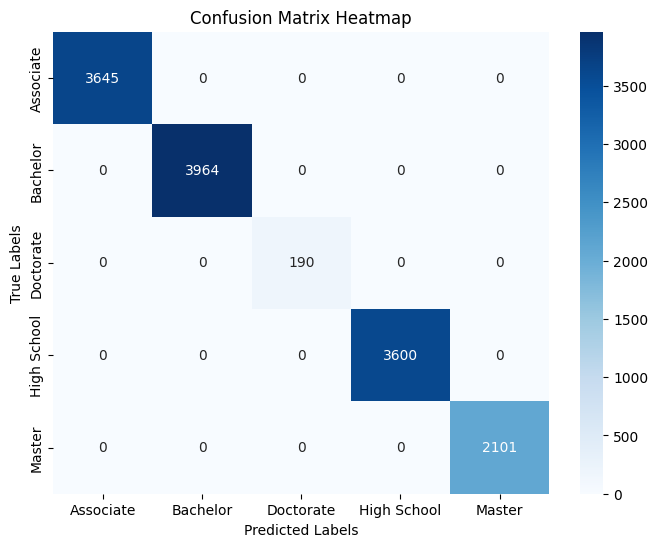

In [ ]:
# Convert y_test and y_pred from one-hot encoding to class indices
y_test_indices = np.argmax(y_test, axis=1)
y_pred_indices = np.argmax(y_pred, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_indices, y_pred_indices)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


Penjelasn matrik:
Gambar tersebut adalah *confusion matrix heatmap* yang menunjukkan hasil prediksi model terhadap lima kelas: **Associate**, **Bachelor**, **Doctorate**, **High School**, dan **Master**. Berikut adalah poin-poin utama:

1. **Diagonal Dominan**: Nilai terbesar berada pada diagonal (misalnya, 3645 pada "Associate"), menunjukkan bahwa model memprediksi banyak data dengan benar sesuai label aslinya.
   
2. **Kesalahan Nol**: Tidak ada kesalahan prediksi di luar diagonal. Semua kelas diprediksi secara akurat, artinya model memiliki akurasi 100%.

3. **Distribusi Data**: Jumlah data pada tiap kategori berbeda, dengan "Associate" (3645), "Bachelor" (3964), "High School" (3600), dan "Master" (2101) memiliki jumlah data lebih banyak dibandingkan "Doctorate" (190).

**Kesimpulan**: Model bekerja sangat baik dengan tidak ada kesalahan klasifikasi pada set data ini.

In [ ]:
def evaluate_model(y_test, y_pred, is_binary=True):
    # Choose 'binary' for binary classification, otherwise use 'weighted' for multiclass
    average_type = 'binary' if is_binary else 'weighted'

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average_type, zero_division=0)
    recall = recall_score(y_test, y_pred, average=average_type)
    f1 = f1_score(y_test, y_pred, average=average_type)

    # Print results
    print(f"The Accuracy of Prediction : {accuracy:0.3f}")
    print(f"The Precision of Prediction : {precision:0.3f}")
    print(f"The Recall of Prediction : {recall:0.3f}")
    print(f"The F1-Score of Prediction : {f1:0.3f}")

# Example call to the function
evaluate_model(y_test, y_pred, is_binary=False)  # Use is_binary=False for multiclass tasks

The Accuracy of Prediction : 1.000
The Precision of Prediction : 1.000
The Recall of Prediction : 1.000
The F1-Score of Prediction : 1.000


Penjelasan:
**Hasil evaluasi model Logistic Regression dengan penjelasan berikut:**

1. **Accuracy:** 88.78%  
   - Model berhasil memprediksi dengan benar sebanyak 88.78% dari total data uji. Ini menunjukkan bahwa secara keseluruhan, model memiliki performa yang sangat baik.

2. **Precision:** 75.38%  
   - Dari semua prediksi yang diklasifikasikan sebagai "Approved", sebanyak 75.38% adalah benar. Precision penting jika kesalahan positif (false positive) harus diminimalkan.

3. **Recall:** 73.50%  
   - Dari semua kasus yang sebenarnya "Approved", model berhasil mendeteksi 73.50%. Recall penting ketika tujuan utama adalah menangkap sebanyak mungkin kasus positif, meskipun ada kemungkinan false positives.

4. **F1 Score:** 74.43%  
   - Rata-rata harmonik antara Precision dan Recall menunjukkan keseimbangan antara akurasi prediksi positif dan cakupan kasus positif. Skor ini menunjukkan performa model yang stabil dalam mendeteksi kasus yang benar secara konsisten.